


ENCODING OF CODON SEQUENCES OF PROTEINS INTO COMPLEX NUMBERS AND THEIR CLASSIFICATION BY COMPLEX DEEP LEARNING METHODS:

Step 1 (Data import): The raw DNA sequences of the kinase and GPCR proteins are imported separately in fasta form using accession numbers from the NCBI gene bank to be used as codon form. Kinase and GPCR DNA sequences are imported separately in two stages.

Step 2 (Data preprocessing): For use as codon form, the DNA sequences of the Kinase and GPCR proteins are labelled as "1" and "0", limited to 900, randomly shuffled and concatenated and saved as a single data frame in fasta form.

Step 3 (Complex Coding): The data frame in categorical form is converted into complex numbers by the proposed Complex Codon Encoding Method in codon form and saved as a complex-valued data frame.

Step 4 (Classification): Using the Complex-valued data frame generated by the codon coding method, Kinase and GPCR proteins are classified by Complex deep learning method.

Step 5 (Results and Graphs): Classification results measured by different metrics are visualised with Graphs.

STEP 1:DATA IMPORT

a) DNA sequences of Kinase proteins with accession numbers from NCBI are imported and saved as 'fasta'.

In [ ]:
#For the kinase protein family, it imports 100 nucleotide sequence samples corresponding to proteins (CDS) from NCBI and saves them in a file:

#Importing 100 nucleotide sequences (CDS) for kinase:

from Bio import Entrez, SeqIO
import pandas as pd

# Set email address for Entrez requests
Entrez.email = "https://www.ncbi.nlm.nih.gov/protein"  #  email goes here

# Define protein accession numbers
accessions = ["CAA77753.1",
"CAA77752.1",
"CAA42411.1",
"CAA33389.1",
"CAA42556.1",
"CAA42713.1",
"CAA44396.1",
"CAA42744.1",
"CAA38700.1",
"CAA40491.1",
"CAA43372.1",
"CAA46388.1",
"NP_001015048.1",
"CAA78813.1",
"CAA39849.1",
"CAA47001.1",
"CAA47002.1",
"CAA47004.1",
"CAA47006.1",
"CAA47008.1",
"AAH93072.1",
"AAA51548.1",
"AAA35503.1",
"AAA58363.1",
"AAA58364.1",
"AAA58391.1",
"AAB50921.1",
"AAB50922.1",
"AAA58424.1",
"NP_060260.3",
"AAH93822.1",
"AAA76851.1",
"AAA52025.1",
"AAA96609.1",
"AAA98744.1",
"AAH92416.1",
"AAC14449.1",
"AAC14450.1",
"AAC14451.1",
"AAA58459.1",
"NP_008959.3",
"NP_001015878.1",
"BAD96360.1",
"AAA59502.1",
"AAA59555.1",
"AAB59362.1",
"AAA36318.1",
"AAA36406.1",
"AAB59449.1",
"AAA36409.1",
"AAA36410.1",
"AAA36411.1",
"AAA03176.1",
"AAA18253.1",
"AAA36442.1",
"AAA60095.1",
"BAD96365.1",
"AAA60099.1",
"AAA60170.1",
"AAA03175.1",
"AAC41690.1",
"AAA60102.1",
"AAA60100.1",
"AAA60104.1",
"AAA36449.1",
"AAA36539.1",
"BAA01547.1",
"AAC82497.1",
"BAD96423.1",
"AAB26341.1",
"AAA35639.1",
"AAA58620.1",
"AAA52643.1",
"AAA52644.1",
"AAA36206.1",
"AAA59540.1",
"AAA36488.1",
"AAA36748.1",
"CAA48870.1",
"CAA41728.1",
"CAA51837.1",
"BAD96489.1",
"AAA36585.1",
"AAA36614.1",
"AAA36615.1",
"AAA52576.1",
"AAA36657.1",
"AAA60078.1",
"AAA60175.1",
"AAA18284.1",
"AAA36659.1",
"AAA18251.1",
"BAD96647.1",
"AAA03565.1",
"AAA60171.1",
"AAC50062.1",
"AAA35673.1",
"AAA16703.1",
"CAA53536.1",
"AAA18225.1"]  # Replace with your protein accession number

# Fetch nucleotide sequences coding for the proteins and store them in a list
records = []
for accession in accessions:
    handle = Entrez.efetch(db="protein", id=accession, rettype="fasta_cds_na", retmode="text")
    record = SeqIO.read(handle, "fasta")
    records.append(record)
    handle.close()

# Create pandas dataframe with the accession numbers and sequences
data = []
for record in records:
    accession = record.id.split(".")[0]  # Remove version number
    sequence = str(record.seq)
    data.append({"Accession": accession, "Sequence": sequence})
df = pd.DataFrame(data)

# Save dataframe to excel file
df.to_excel("C://Users//matya//OneDrive//Masaüstü//protein_dizisi//fulldata//KİNAZ_CDS_DNA.xlsx", index=False)


Below are the first five lines of the KİNAZ DNA sequences downloaded to the file, printed with .head():

In [1]:
# Print first 5 lines of User File path using .head()

import pandas as pd

output_file = "C://Users//matya//OneDrive//Masaüstü//protein_dizisi//fulldata//KİNAZ_CDS_DNA.xlsx"

# Read the output file
output_data = pd.read_excel(output_file)

print(output_data.head())

    Accession                                           Sequence
0  lcl|Z11695  ATGGTCCGCGGGCAGGTGTTCGACGTGGGGCCGCGCTACACCAACC...
1  lcl|Z11694  ATGGCGGCGGCGGCGGCGGCGGGCGCGGGCCCGGAGATGGTCCGCG...
2  lcl|X59727  ATGGCTGAGAAGGGTGACTGCATCGCCAGTGTCTATGGGTATGACC...
3  lcl|X15334  ATGCCCTTCTCCAACAGCCACAACGCACTGAAGCTGCGCTTCCCGG...
4  lcl|X59932  ATGTCAGCAATACAGGCCGCCTGGCCATCCGGTACAGAATGTATTG...




b) DNA sequences of GPCR proteins with accession numbers from NCBI are imported and saved as 'fasta'.

In [ ]:
#For the kinase protein family, imports the 100 nucleotide sequence (CDS) from NCBI and saves it to a file:

# Importing GPCR nucleotide sequence (CDS)

from Bio import Entrez, SeqIO
import pandas as pd

# Set email address for Entrez requests
Entrez.email = "https://www.ncbi.nlm.nih.gov/protein"  # Your email goes here

# Define protein accession numbers
accessions = ["CAA77746.1",
"CAA40530.1",
"CAA38699.1",
"CAA39286.1",
"CAA45319.1",
"CAA33336.1",
"CAA33337.1",
"CAA77558.1",
"CAA40963.1",
"AAA35491.1",
"AAA58353.1",
"AAA58355.1",
"AAA51570.1",
"AAA51598.1",
"AAA35535.1",
"AAA62831.1",
"AAA58408.1",
"AAB05207.1",
"AAA88024.1",
"AAA52342.1",
"AAA35847.1",
"AAA52478.1",
"AAA88050.1",
"AAA58647.1",
"AAA58675.1",
"AAA36108.1",
"AAA59933.1",
"AAA36366.1",
"AAA16594.1",
"AAA60001.1",
"AAA60070.1",
"BAA01920.1",
"BAA14398.1",
"BAA01720.1",
"BAA01050.1",
"BAA01722.1",
"BAA02445.1",
"CAA43953.1",
"CAA39284.1",
"AAA35604.1",
"AAA35924.1",
"AAA16617.1",
"CAA50641.1",
"CAA68560.1",
"AAB25531.1",
"AAB26273.1",
"AAA36605.1",
"AAA58247.1",
"AAA60315.1",
"AAA60316.1",
"AAA36641.1",
"AAA36646.1",
"AAA60601.1",
"AAA03651.1",
"CAA52376.1",
"AAC37538.1",
"AAA03209.1",
"AAC52063.1",
"CAA50979.1",
"AAC13372.1",
"AAC13373.1",
"CAA54182.1",
"AAA36434.1",
"AAA60002.1",
"AAA17684.1",
"BAA05840.1",
"AAA73958.1",
"AAA74230.1",
"CAA54031.1",
"AAA19119.1",
"AAB60351.1",
"CAA84380.1",
"AAA98990.1",
"CAA46621.1",
"AAB60656.1",
"AAC09005.1",
"BAA03319.1",
"AAB29854.1",
"AAB31320.1",
"AAB59437.1",
"AAC14460.1",
"AAA64592.1",
"AAA64593.1",
"BAA04120.1",
"AAC50158.1",
"AAA63180.1",
"AAA62837.1",
"AAA63181.1",
"AAA61794.1",
"CAA58749.1",
"CAA58739.1",
"CAA58740.1",
"AAB59486.1",
"AAA62158.1",
"AAB59487.1",
"AAA98457.1",
"AAA62271.1",
"AAA63906.1",
"BAA08618.1",
"CAA57019.1"]  # Replace with your protein accession number

# Fetch nucleotide sequences coding for the proteins and store them in a list
records = []
for accession in accessions:
    handle = Entrez.efetch(db="protein", id=accession, rettype="fasta_cds_na", retmode="text")
    record = SeqIO.read(handle, "fasta")
    records.append(record)
    handle.close()

# Create pandas dataframe with the accession numbers and sequences
data = []
for record in records:
    accession = record.id.split(".")[0]  # Remove version number
    sequence = str(record.seq)
    data.append({"Accession": accession, "Sequence": sequence})
df = pd.DataFrame(data)

# Save dataframe to excel file
df.to_excel("C://Users//matya//OneDrive//Masaüstü//protein_dizisi//fulldata//GPCR_CDS_DNA.xlsx", index=False)

Below are the first five lines of the GPCR DNA sequences downloaded to the file, printed with .head():

In [2]:
# Print first 5 lines of User File path using .head()

import pandas as pd

output_file = "C://Users//matya//OneDrive//Masaüstü//protein_dizisi//fulldata//GPCR_CDS_DNA.xlsx"

# Read the output file
output_data = pd.read_excel(output_file)

print(output_data.head())

    Accession                                           Sequence
0  lcl|Z11687  ATGCTCATGGCGTCCACCACTTCCGCTGTGCCTGGGCATCCCTCTC...
1  lcl|X57250  ATGAACTCCTTCAATTATACCACCCCTGATTATGGGCACTATGATG...
2  lcl|X54937  ATGAAGTCGATCCTAGATGGCCTTGCAGATACCACCTTCCGCACCA...
3  lcl|X55760  ATGAGGACTCTGAACACCTCTGCCATGGACGGGACTGGGCTGGTGG...
4  lcl|X63819  ATGGAAACCAACTTCTCCACTCCTCTGAATGAATATGAAGAAGTGT...


 STEP 3: CODON DATA PREPROCESSING AND COMPLEX CODON ENCODING

Description: Kinaz ve GPCR proteinlerinin iki farklı dosyadaki DNA dizileri (üçlü bazlar) Kodon formunda alınır, 900 ile sınırlandırılır, "1" ve "0" olarak etiketlenir, rastgele karıştırılıp birleştirilir ve fasta formunda tek bir veri çerçevesi olarak kaydedilir. . Daha sonra önerilen karmaşık kodon kodlama yöntemiyle karmaşık sayılara kodlanır. Tek bir karmaşık veri çerçevesi olarak kaydedilir.

In [3]:
# It takes DNA sequences in Codon form, pre-processes the data and encodes them into complex numbers by the proposed method.
# (Limits the sequences, labels the two classes, combines them into a single dataframe, randomly shuffles and saves them)

import pandas as pd
import numpy as np
import cmath
import random

def read_fasta_file(file_path):
    data = pd.read_excel(file_path)
    return data['Sequence'].tolist()

def process_dna_sequence(sequence, label, max_length=900):
    if len(sequence) > max_length:
        sequence = sequence[:max_length]
    return sequence, label

def split_to_codons(sequence):
    return [sequence[i:i+3] for i in range(0, len(sequence), 3)]

def map_to_complex(codon, codon_siralama, index):
    k = codon_siralama.index(codon) + 1
    return index * np.exp(complex(0, k * np.pi / 32))

def convert_to_features(complex_num):
    return round(complex_num.real, 5), round(complex_num.imag, 5), round(abs(complex_num), 5), round(cmath.phase(complex_num), 5)

def pad_complex_sequence(complex_values, target_length=100):
    if len(complex_values) < target_length:
        complex_values.extend([(0, 0, 0, 0)] * (target_length - len(complex_values)))
    return complex_values

# Read files
kinaz_data = read_fasta_file("D:\datasetTEZ\KİNASE_DNA_Fasta.xlsx")
gpcr_data = read_fasta_file("D:\datasetTEZ\GPCR_DNA_Fasta.xlsx")

# Add labels
kinaz_data = [(seq, 1) for seq in kinaz_data]
gpcr_data = [(seq, 0) for seq in gpcr_data]

# Process data
processed_data = [process_dna_sequence(seq, label) for seq, label in kinaz_data + gpcr_data]

# mix randomly
random.shuffle(processed_data)

# Codon Symmetric order
kodon_siralama = ["TTT", "TTC", "TTA", "TTG", "TCT", "TCC", "TCA", "TCG", "TAT", "TAC", "TAA", "TAG", "TGT", "TGC", "TGA", "TGG", "CTT", "CTC", "CTA", "CTG", "CCT", "CCC", "CCA", "CCG", "CAT", "CAC", "CAA", "CAG", "CGT", "CGC", "CGA", "CGG", "AAA", "AAG", "AAT", "AAC", "AGA", "AGG", "AGT", "AGC", "ATA", "ATG", "ATT", "ATC", "ACA", "ACG", "ACT", "ACC", "GAA", "GAG", "GAT", "GAC", "GGA", "GGG", "GGT", "GGC", "GTA", "GTG", "GTT", "GTC", "GCA", "GCG", "GCT", "GCC"]

# Edit for DataFrame
result = pd.DataFrame(columns=['Label', 'Sequence', 'Complex Vektör', 'Complex Number', 'Real', 'Imag', 'Modulus', 'Angle'])

for seq, label in processed_data:
    codons = split_to_codons(seq)
    complex_values = []
    complex_numbers = []
    for index, codon in enumerate(codons):
        if codon in kodon_siralama:
            complex_num = map_to_complex(codon, kodon_siralama, index)
            real, imaginary, modulus, angle = convert_to_features(complex_num)
            real, imaginary, modulus, angle = round(real, 5), round(imaginary, 5), round(modulus, 5), round(angle, 5)
            complex_values.append((real, imaginary, modulus, angle))
            complex_numbers.append(complex(round(real, 5), round(imaginary, 5)))
    complex_values = pad_complex_sequence(complex_values, target_length=100)
    temp_df = pd.DataFrame({'label': [label], 'Sequence': [seq], 'Complex Vektör': [complex_values], 'Complex Number': [complex_numbers], 'Real': [[x[0] for x in complex_values]], 'Imag': [[x[1] for x in complex_values]], 'Modulus': [[x[2] for x in complex_values]], 'Angle': [[x[3] for x in complex_values]]})

    result = pd.concat([result, temp_df], ignore_index=True)

# Save results to Excel file
result.to_excel("D:\datasetTEZ\KİNASE_GPCR_Codon_Complex_Encoding.xlsx", index=False)


First 5 lines of dataframe labeled as Kinase (1) and GPCR (0) and encoded into complex numbers as codon form

In [4]:
# Print first 5 lines of User File path using .head()

import pandas as pd

output_file = "D:\datasetTEZ\KİNASE_GPCR_Codon_Complex_Encoding.xlsx"

# Read the output file
output_data = pd.read_excel(output_file)

print(output_data.head())

   Label                                           Sequence  \
0    NaN  ATGTCAGCCGAGGTGCGGCTGAGGCGGCTCCAGCAGCTGGTGTTGG...   
1    NaN  ATGTTTGCAGACTTGGATTATGACATCGAAGAGGATAAACTCGGAA...   
2    NaN  ATGTCGAAGCCCCATAGTGAAGCCGGGACTGCCTTCATTCAGACCC...   
3    NaN  ATGGAGCTGGAAAACATCGTGGCCAACACGGTCTTGCTGAAAGCCA...   
4    NaN  ATGGCTCTAAATGACTGTTTCCTTCTGAACTTGGAGGTGGACCATT...   

                                      Complex Vektör  \
0  [(0.0, -0.0, 0.0, -0.0), (0.77301, 0.63439, 1....   
1  [(0.0, -0.0, 0.0, -0.0), (0.99518, 0.09802, 1....   
2  [(0.0, -0.0, 0.0, -0.0), (0.70711, 0.70711, 1....   
3  [(0.0, -0.0, 0.0, -0.0), (0.19509, -0.98079, 1...   
4  [(0.0, -0.0, 0.0, -0.0), (0.99518, -0.09802, 1...   

                                      Complex Number  \
0  [-0j, (0.77301+0.63439j), (2-0j), (0.58527-2.9...   
1  [-0j, (0.99518+0.09802j), (1.91388-0.58057j), ...   
2  [-0j, (0.70711+0.70711j), (-1.96157-0.39018j),...   
3  [-0j, (0.19509-0.98079j), (-0.76537+1.84776j),...   
4  [

<Figure size 640x480 with 0 Axes>

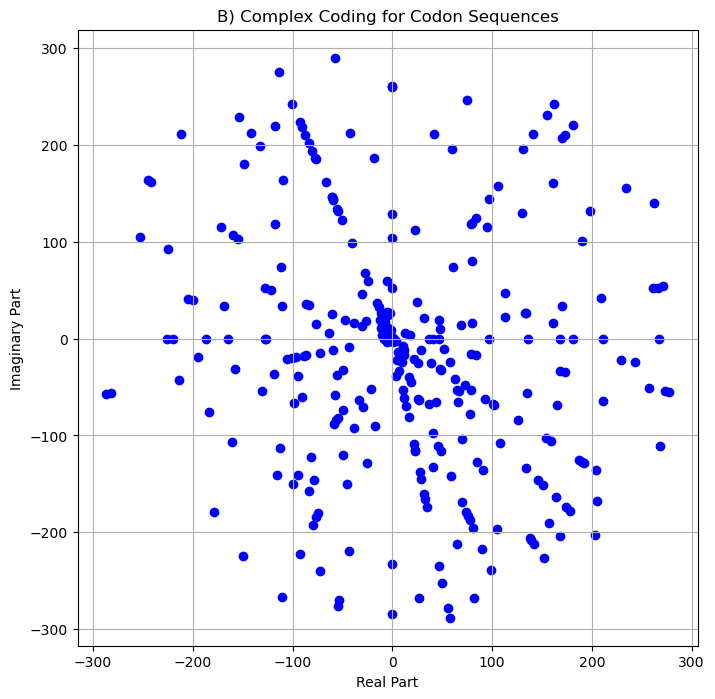

In [4]:
#Example of a sequence converted to complex numbers view in the planev
import matplotlib.pyplot as plt

# Complex number of Example of a sequence
complex_numbers = [-0j, (0.77301+0.63439j), (2-0j), (0.58527-2.94236j), (3.32588-2.22228j), (-5+0j), (-2.2961+5.54328j), (-5.82029-3.88899j), (-8+0j), (-1.75581+8.82707j), (-9.2388+3.82683j), (-10.16267+4.20952j), (-4.5922+11.08655j), (10.8091-7.22241j), (12.93431+5.35757j), (5.74025-13.85819j), (-11.31371+11.31371j), (12.02082-12.02082j), (17.65414+3.51163j), (-7.27099+17.55371j), (11.1114-16.62939j), (-8.03635+19.40147j), (4.29199-21.57728j), (-12.77812+19.1238j), (-9.1844+22.17311j), (-4.87726+24.51963j), (9.94977-24.02087j), (-2.64646+26.86999j), (-5.46253+27.46199j), (-11.09782+26.79251j), (21.2132-21.2132j), (28.64027-11.86319j), (-26.60703+17.77825j), (-30.48802+12.62855j), (6.63307-33.3467j), (-13.39392+32.33578j), (25.45584-25.45584j), (37-0j), (31.59585+21.11167j), (3.82267-38.8122j), (-15.30734+36.95518j), (41-0j), (-38.80294+16.0727j), (16.45539-39.72682j), (-43.15455-8.58397j), (25.00066+37.41613j), (38.2476-25.55623j), (47-0j), (18.3688-44.34622j), (48.05848+9.55943j), (46.19398+19.13417j), (-47.11786+19.51686j), 52j, (51.98162-10.33979j), (10.53488-52.96241j), (-30.55636+45.73083j), (-21.43027-51.73725j), (47.39377-31.6675j), (48.22524-32.22307j), (-49.05671-32.77864j), (-5.88103+59.71108j), (-59.8279-11.90051j), (12.0956-60.80869j), (58.20441-24.10906j), (-63.69182+6.2731j), (-24.87442+60.05217j), (-60.97605+25.25711j), (-55.70846-37.22321j), (26.02247-62.82381j), (26.40516-63.74769j), (68.65497+13.65632j), (13.85141-69.63575j), (-33.94057-63.49833j), (-27.93589+67.44321j), (-72.57811-14.43668j), (62.36022-41.66777j), (-29.08394-70.21484j), (36.29755-67.90794j), (-76.50125+15.21705j), (43.89005-65.6861j), (78.46282-15.60723j), (79.44361+15.80232j), (-57.98276-57.98276j), (16.1925-81.40518j), (64.93288-53.28904j), (83.36675-16.58268j), (66.4789-54.55782j), (72.33786-48.33461j), (-86.3091-17.16795j), (-49.44575-74.0008j), (-88.27068-17.55813j), (-84.07304+34.82419j), (-17.94831-90.23225j), (65.76093-65.76093j), (-86.84468+35.97224j), (78.98961-52.77917j), (60.90176+74.209j), (97-0j), (-54.44588-81.48402j), (-97.09774-19.31394j), (-38.26834-92.38795j), (-56.11259-83.97843j), (-94.23571-39.03371j), (-101.02088-20.0943j), 104j, (40.18176-97.00735j), (-58.89044-88.13578j), (-40.94713+98.85511j), (-105.92481-21.06975j), (-90.63019-60.55716j), (77.78175-77.78175j), (21.65503-108.86717j), (93.1246-62.22387j), (79.90307+79.90307j), (22.2403+111.80952j), (112.79031+22.43539j), (-111.00508+33.67302j), (22.82557-114.75188j), (23.02066-115.73266j), (-98.94488-66.11286j), (45.92201-110.86554j), (100.60782-67.224j), (112.7133+46.68738j), (102.27076-68.33514j), (-118.6606-35.9953j), (69.44628-103.9337j), (48.21811-116.40882j), (-127+0j), (-128+0j), 129j, (-49.74885-120.10434j), (-25.55683-128.48287j), (-121.9521+50.51421j), (-50.8969+122.87598j), (-111.41693+74.44641j), (132.40601+26.33719j), (136-0j), (134.36758+26.72737j), (-127.49538+52.81031j), (40.34957-133.01471j), (27.31265-137.30994j), (-130.26701-53.95836j), (78.89097+118.06868j), (-54.72373+132.11477j), (80.00211+119.73162j), (-55.4891+133.96253j), (134.88641-55.87178j), (-81.66882-122.22603j), (28.87337-145.15622j), (94.5246+115.17856j), (83.33553+124.72044j), (125.55191-83.89111j), (107.48023-107.48023j), (85.00225-127.21485j), (58.93325-142.27745j), (-59.31593+143.20133j), (-59.69862+144.12521j), (-45.57469-150.23963j), (-60.46398+145.97297j), (-60.84667+146.89685j), (-113.13708-113.13708j), (-157.90643-31.40954j), (161.21993+15.87878j), (90.55795-135.52955j), (31.99481-160.84879j), (-165+0j), (-78.25186-146.39893j), (-118.08683+118.08683j), (168-0j), (32.97026-165.75271j), (-94.44694-141.34983j), (167.71428-33.36045j), (-168.69507+33.55554j), (169.67585+33.75063j), (96.66922+144.67571j), (-66.9696+161.67892j), (172.61821-34.3359j), (34.53099-173.59899j), (-83.90862-156.98199j), (165.37444-68.50033j), (-100.00264-149.66453j), (181-0j), (-115.45958-140.6879j), (70.03107-169.06995j), (130.10765+130.10765j), (153.82188-102.78049j), (-154.65335+103.33606j), (-187+0j), (-18.42722+187.09473j), (133.64318-133.64318j), (105.55834+157.97923j), (158.8107-106.11391j), (-159.64217+106.66948j), (-160.47364-107.22505j), (74.24059-179.23263j), (-74.62327-180.15651j), (-195.05621-19.21136j), (-109.44734+163.79951j), (75.77132-182.92815j), (-183.85203-76.154j), (-76.53669-184.77591j), (-76.91937+185.69979j), (-77.30205+186.62367j), (77.68474-187.54755j), (-200.0802+39.79843j), (59.50836+196.17277j), (145.664-145.664j), (-172.11421+115.00304j), (-79.59815-192.16694j), (-204.98412+40.77388j), (-80.36352+194.0147j), (211-0j), (81.12889-195.86246j), (208.90726+41.55424j), (151.32085-151.32085j), (189.61307+101.3503j), (42.13951+211.84962j), (-42.3346+212.83041j), (-213.81119-42.52969j), (-83.80767+202.32962j), (-220+0j), (211.48381-64.15291j), (64.4432-212.44075j), (105.12147-196.66844j), (-43.70023-219.6959j), (187.08066-125.0033j), (-226+0j), (160.51324+160.51324j), (-87.25182+210.64453j), (190.40654-127.22558j), (228.89249-22.54394j), (192.06948-128.33672j), (164.04877-164.04877j), (-0-233j), (-148.44803+180.88445j), (89.93061-217.11169j), (131.11457+196.22683j), (-90.69597+218.95945j), (197.88977+132.22572j), (-132.78129+198.72124j), (46.82168-235.38847j), (-92.22671-222.65497j), (-92.60939+223.57885j), (-224.50273+92.99207j), (242.82507-23.91618j), (203.71006-136.11471j), (173.94827-173.94827j), (156.69514-190.93358j), (137.78142-206.20446j), (-117.37779+219.59839j), (138.89256-207.8674j), (-72.86145-240.19202j), (178.19091-178.19091j), (-178.89802-178.89802j), (141.11484+211.19328j), (141.67041-212.02475j), (-142.22598+212.85622j), (50.13821-252.06182j), (74.89345+246.89061j), (99.11501-239.2848j), 260j, 261j, (256.96574-51.11366j), (-100.64574+242.98032j), (167.47983-204.07476j), (204.84777-168.11422j), (260.88888+51.89403j), (267-0j), (170.0174+207.1668j), (26.36661-267.70469j), (-150.00396-224.4968j), (265.79281+52.86948j), (172.55497+210.25884j), (151.67067-226.9912j), (-253.14299+104.85526j), (-53.64984-269.71595j), (-153.33738+229.48561j), (271.67752+54.04002j), (154.44852+231.14855j), (273.63909-54.4302j), (81.27971-267.94329j), (233.64296+156.11524j), (-55.01547-276.58145j), (277.56223-55.21056j), (55.40565-278.54302j), (-0-285j), (181.43648+221.08099j), (202.93965-202.93965j), (-282.46616-56.18601j), (-110.59551-267.00118j), (267.92506-110.9782j), (-241.95766+161.67094j), (162.22651+242.78913j), (-287.37009-57.16146j), (57.35655-288.35087j), (-245.28354+163.89322j), (-57.74674+290.31244j), (261.93062+140.00483j), (-114.03966+275.3161j), (-211.42493+211.42493j)]
#real ve ımaj part
real_parts = [z.real for z in complex_numbers]
imaginary_parts = [z.imag for z in complex_numbers]

plt.savefig("high_quality_plots.png", dpi=600)

# çizim
plt.figure(figsize=(8, 8))
plt.scatter(real_parts, imaginary_parts, color='blue')
plt.xlabel('Real Part')
plt.ylabel('Imaginary Part')
plt.title('B) Complex Coding for Codon Sequences')
plt.grid(True)
plt.show()


STEP 4 : CLASSIFICATION OF PROTEIN (CODON) SEQUENCES USING COMPLEX VALUE DEEP LEARNING

Codon sequences of Kinase and GPCR proteins encoded in complex values are classified by Complex deep learning method.

Short Description: Although building and training neural networks from scratch can be lengthy and difficult, the embedded modules of the Keras and Tensorflow libraries, which run in the background and are preloaded in Python, make the task easier as they can perform basic operations such as backpropagation. Since complex-valued neural networks are still an active research topic, there is still a need to define specialised classes for model development. In this study, a special "ComplexDense" class that can perform complex operations is defined using Tensorflow and Keras libraries. The complex hyperbolic tangent (ctanh) activation function is used in the model. The complex network model consists of 5 layers: 1 input layer, 3 hidden layers and 1 output layer. Euclidean norm is used as the error function and Wirtinger derivative is used in back propagation. For binary classification and labelling, the Adam optimisation algorithm performed adequately. The learning rate was set to 0.005 and the model was trained for 80 epochs. How to define a loss function or its derivative that accurately reflects the nature of complex numbers is still an active research topic in the literature, and there are different views and approaches depending on the problem type. Since the Wirtinger-based error function we use performs adequately in the learning process of the model, the approach is acceptable.

In [18]:
# protein classification using CODON dataset with complex deep learning (Complex-Valued Artificial Neural Networks)

import pandas as pd
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Layer
from tensorflow.keras import Input, Model
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score
from tensorflow.keras.activations import relu
from tensorflow.keras.layers import Dense

from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.models import Sequential
# Custom activation functions
def complex_tanh(z):
    return tf.complex(tf.math.tanh(tf.math.real(z)), tf.math.tanh(tf.math.imag(z)))

class ComplexDense(Layer):
    def __init__(self, units, activation=None, **kwargs):
        super(ComplexDense, self).__init__(**kwargs)
        self.units = units
        self.activation = activation

    def build(self, input_shape):
        self.kernel = self.add_weight(shape=(input_shape[-1], self.units, 2),
                                      initializer='random_normal',
                                      trainable=True)
        self.bias = self.add_weight(shape=(self.units, 2),
                                    initializer='zeros',
                                    trainable=True)

    def call(self, inputs):
        inputs_real, inputs_imag = tf.math.real(inputs), tf.math.imag(inputs)
        kernel_real, kernel_imag = self.kernel[..., 0], self.kernel[..., 1]
        bias_real, bias_imag = self.bias[..., 0], self.bias[..., 1]

        output_real = tf.matmul(inputs_real, kernel_real) - tf.matmul(inputs_imag, kernel_imag) + bias_real
        output_imag = tf.matmul(inputs_real, kernel_imag) + tf.matmul(inputs_imag, kernel_real) + bias_imag

        output = tf.complex(output_real, output_imag)

        if self.activation is not None:
            output = self.activation(output)

        return output

def wirtinger_derivative(y_true, y_pred):
    y_true = tf.cast(y_true, tf.complex64)
    y_pred = tf.cast(y_pred, tf.complex64)
    dF_dz = tf.math.conj(y_pred - y_true) 
    dF_dz_star = (y_pred - y_true)
    return dF_dz, dF_dz_star

def wirtinger_loss(y_true, y_pred):
    y_true = tf.cast(y_true, tf.complex64)
    y_pred = tf.cast(y_pred, tf.complex64)
    dF_dz, dF_dz_star = wirtinger_derivative(y_true, y_pred)
    return tf.math.abs(dF_dz)**2 + tf.math.abs(dF_dz_star)**2

# Load the data
data = pd.read_excel("D:\datasetTEZ\KİNASE_GPCR_Codon_Complex_Encoding.xlsx")

X = np.array([np.array(list(map(float, x_real.strip("[]").split(',')))) + 1j * np.array(list(map(float, x_imag.strip("[]").split(',')))) for x_real, x_imag in zip(data['Real'], data['Imag'])])
y = data['label'].values

# Convert labels to one-hot encoded format
y = to_categorical(y, num_classes=2)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)

# Model definition
input_layer = Input(shape=(X_train.shape[1],), dtype=tf.complex64)

complex_dense1 = ComplexDense(10, activation=complex_tanh)(input_layer)
complex_dense2 = ComplexDense(8, activation=complex_tanh)(complex_dense1)
complex_dense3 = ComplexDense(4,activation=complex_tanh)(complex_dense2)

output_layer = ComplexDense(2, activation=complex_tanh)(complex_dense3)

model = Model(inputs=input_layer, outputs=output_layer)

# Define a loss function for complex numbers
def complex_error(y_true, y_pred):
    return tf.reduce_mean(tf.abs(y_true - y_pred))

# Compile the model with the new metric

model.compile(optimizer=Adam(learning_rate=0.005), loss=wirtinger_loss, metrics=[complex_error, 'accuracy'])

# Fit the model and evaluate as before
history = model.fit(X_train, y_train, epochs=80, batch_size=16, validation_data=(X_test, y_test))

# Predict on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Create a confusion matrix
y_test_classes = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_test_classes, y_pred_classes)

# Calculate accuracy and F1 score
accuracy = accuracy_score(y_test_classes, y_pred_classes)
f1 = f1_score(y_test_classes, y_pred_classes, average='macro')

print('Confusion Matrix:\n', cm)
print('Accuracy: ', accuracy)
print('F1 Score: ', f1)


Epoch 1/80
10/10 [==============================] - 1s 27ms/step - loss: 0.9373 - complex_error: 0.4998 - accuracy: 0.5125 - val_loss: 0.8426 - val_complex_error: 0.4985 - val_accuracy: 0.6500
Epoch 2/80
10/10 [==============================] - 0s 3ms/step - loss: 0.7413 - complex_error: 0.4987 - accuracy: 0.6187 - val_loss: 0.6545 - val_complex_error: 0.4972 - val_accuracy: 0.6000
Epoch 3/80
10/10 [==============================] - 0s 3ms/step - loss: 0.5696 - complex_error: 0.4981 - accuracy: 0.6187 - val_loss: 0.5496 - val_complex_error: 0.4977 - val_accuracy: 0.6000
Epoch 4/80
10/10 [==============================] - 0s 4ms/step - loss: 0.5142 - complex_error: 0.4970 - accuracy: 0.6125 - val_loss: 0.5028 - val_complex_error: 0.4962 - val_accuracy: 0.6500
Epoch 5/80
10/10 [==============================] - 0s 4ms/step - loss: 0.4965 - complex_error: 0.4955 - accuracy: 0.6250 - val_loss: 0.4923 - val_complex_error: 0.4943 - val_accuracy: 0.6500
Epoch 6/80
10/10 [=====================

STEP 5: RESULT and GRAPHS Classification results measured by different metrics are visualised with graphs.

Short Description: Kinase and GPCR proteins were encoded into complex numbers using CODON (form) sequences and then classified by Complex Deep networks. Results were measured with Accuracy, Confusion matrix, Precision, Recall and F1 Score metrics. In general, the success values of the model are quite high and the prediction distributions are balanced between classes.

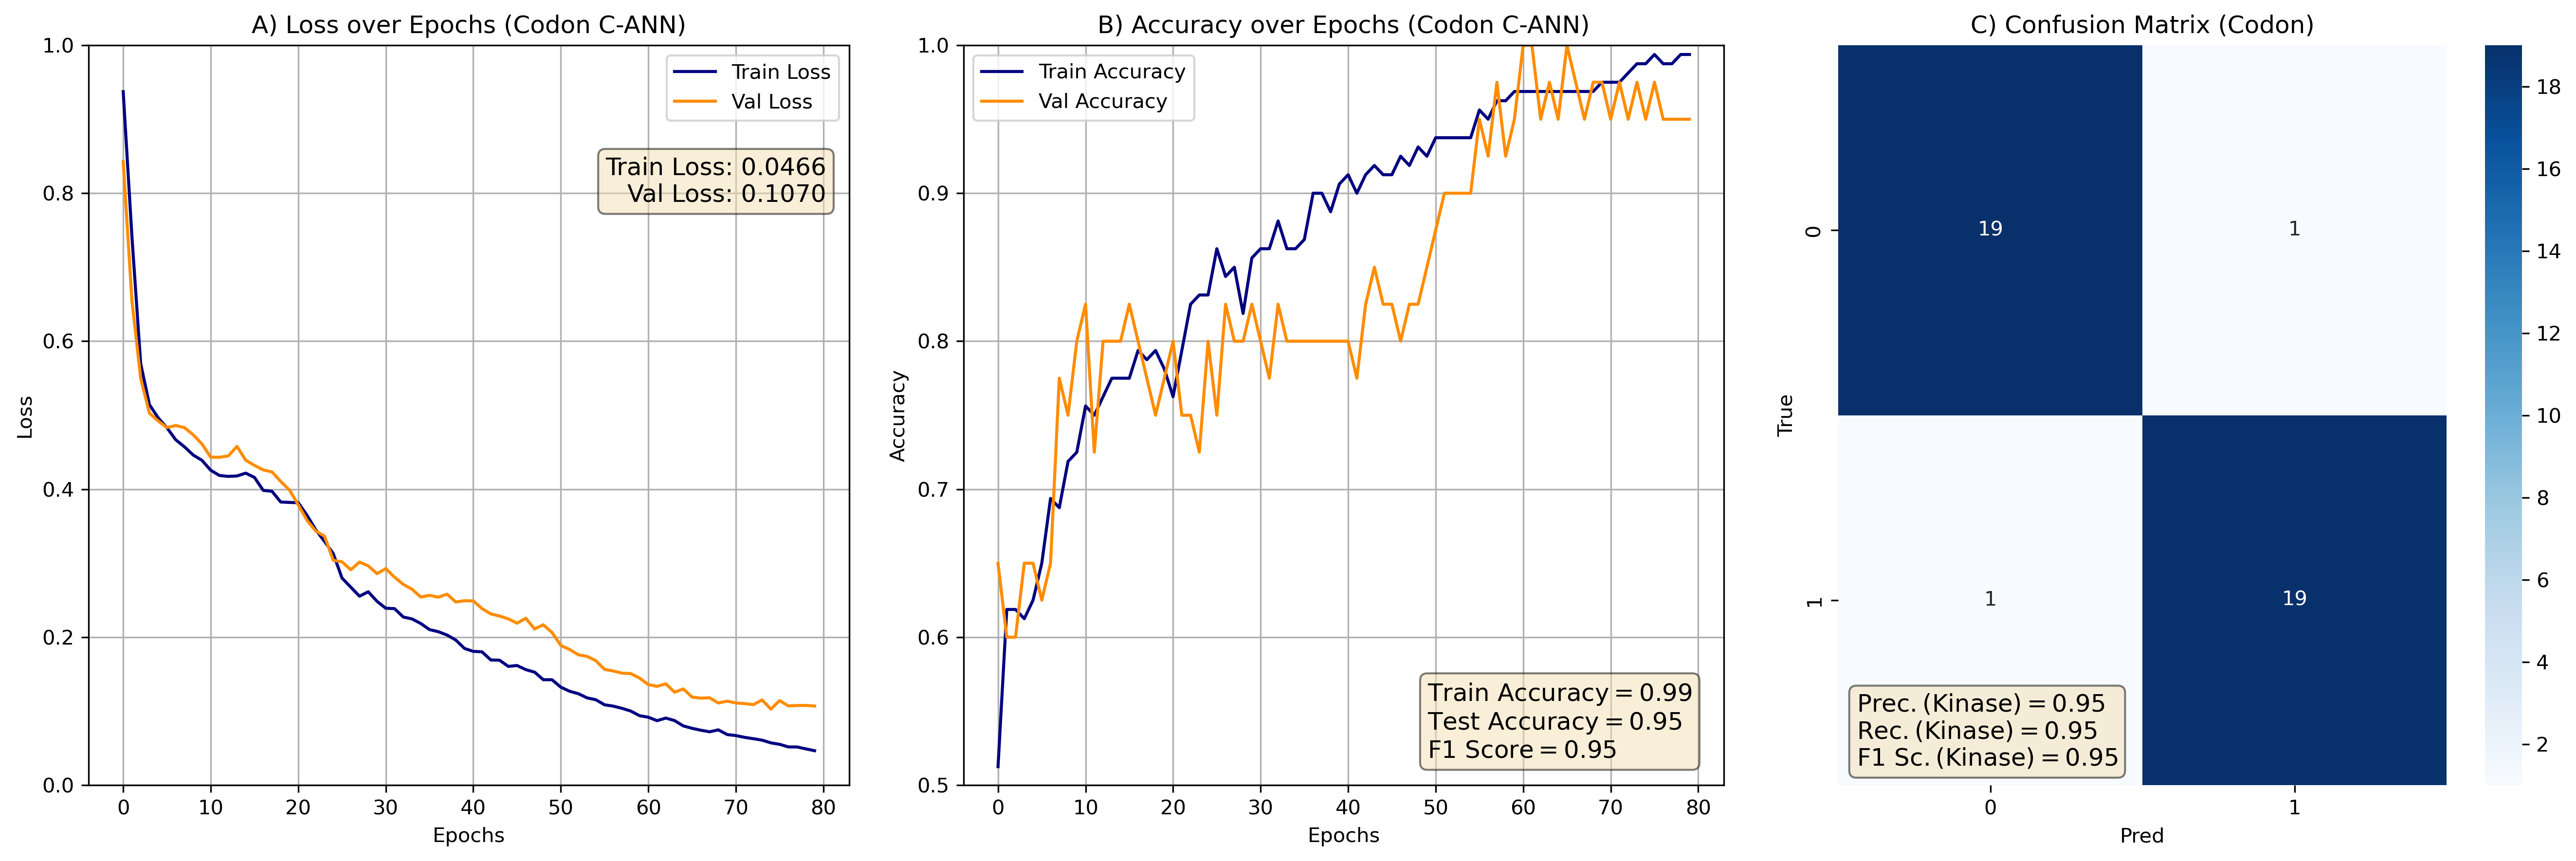

In [23]:
# Plots metric results and graphs & runs in conjunction with complex deep learning code (or it won't run)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

# These codes are run together with Complex-valued deep learning codes and are defined by the model's Test results and training history
# suppose history.history['loss'], history.history['val_loss'], history.history['accuracy'] and history.history['val_accuracy'] are defined)

# Calculate metrics for class A (GPCR) (label 0) and class B (Kinase) (label 1)
precision_A = precision_score(y_test_classes, y_pred_classes, labels=[0], average='macro')
recall_A = recall_score(y_test_classes, y_pred_classes, labels=[0], average='macro')
f1_A = f1_score(y_test_classes, y_pred_classes, labels=[0], average='macro')

precision_B = precision_score(y_test_classes, y_pred_classes, labels=[1], average='macro')
recall_B = recall_score(y_test_classes, y_pred_classes, labels=[1], average='macro')
f1_B = f1_score(y_test_classes, y_pred_classes, labels=[1], average='macro')

# Prepare the text for the confusion matrix plot
textstr_A = '\n'.join((
    r'$\mathrm{Prec.(GPCR)}=%.2f$' % (precision_A,),
    r'$\mathrm{Rec.(GPCR)}=%.2f$' % (recall_A,),
    r'$\mathrm{F1\ Sc.(GPCR)}=%.2f$' % (f1_A,)))

textstr_B = '\n'.join((
    r'$\mathrm{Prec.(Kinase)}=%.2f$' % (precision_B,),
    r'$\mathrm{Rec. (Kinase)}=%.2f$' % (recall_B,),
    r'$\mathrm{F1\ Sc.(Kinase)}=%.2f$' % (f1_B,)))

# Get the last training and validation accuracy from the history object
train_accuracy = history.history['accuracy'][-1]
val_accuracy = history.history['val_accuracy'][-1]
train_loss = history.history['loss'][-1]
val_loss = history.history['val_loss'][-1]

# Create text string for the training accuracy, validation accuracy and F1 score
textstr = '\n'.join((
    r'$\mathrm{Train\ Accuracy}=%.2f$' % (train_accuracy,),
    r'$\mathrm{Test\ Accuracy}=%.2f$' % (val_accuracy,),
    r'$\mathrm{F1\ Score}=%.2f$' % (f1_score(y_test_classes, y_pred_classes, average='macro'))))

# Start figure and axis
fig, ax = plt.subplots(1, 3, figsize=(18, 6), dpi=300)

# Plot loss
ax[0].plot(history.history['loss'], color='navy', label='Train Loss')
ax[0].plot(history.history['val_loss'], color='darkorange', label='Val Loss')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].legend()
ax[0].grid(True)
ax[0].set_title('A) Loss over Epochs (Codon C-ANN)')
ax[0].set_ylim(0.0, 1.0)  # Kayıp grafiği için aralığı burada ayarlıyorsunuz

# Plot accuracy
ax[1].plot(history.history['accuracy'], color='navy', label='Train Accuracy')
ax[1].plot(history.history['val_accuracy'], color='darkorange', label='Val Accuracy')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
ax[1].legend()
ax[1].grid(True)
ax[1].set_title('B) Accuracy over Epochs (Codon C-ANN)')
ax[1].set_ylim(0.5, 1.0)  # Doğruluk grafiği için aralığı burada ayarlıyorsunuz

# Place a text box in upper left in loss plot (first subplot)
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax[0].text(0.97, 0.85, f'Train Loss: {train_loss:.4f}\nVal Loss: {val_loss:.4f}', transform=ax[0].transAxes, fontsize=12, horizontalalignment='right', verticalalignment='top', bbox=props)

# Place a text box in upper left in accuracy plot (second subplot)
ax[1].text(0.61, 0.14, textstr, transform=ax[1].transAxes, fontsize=12, verticalalignment='top', bbox=props)

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt="d", ax=ax[2], cmap='Blues')
ax[2].set_xlabel('Pred')
ax[2].set_ylabel('True')
ax[2].set_title('C) Confusion Matrix (Codon)')

#this part did not need to be calculated
# Place text box for class A metrics in the left of confusion matrix plot
#ax[2].text(0.03, 0.02, textstr_A, transform=ax[2].transAxes, fontsize=12,
           #verticalalignment='bottom', bbox=props) 

# Place text box for class B metrics in the right of confusion matrix plot
ax[2].text(0.03, 0.02, textstr_B, transform=ax[2].transAxes, fontsize=12,
           verticalalignment='bottom', bbox=props)

plt.tight_layout()
plt.savefig("high_quality_plots.png", dpi=600)
plt.show()

RESULT: It is seen that the model's loss values decreased steadily over the periods to 0.10 levels for the test and training data sets, while the accuracy rate increased steadily and reached approximately 0.95 for the test data. These observations show that the learning process of the model on the data set was successful and the generalization capacity of the model is high. In general, the training and testing graphs of the model are close to each other. Analyzing the confusion matrix for the test data shows that the predictions are balanced between GPCR and Kinase classes.

The results show that the proposed complex coding method is effective in representing Codon sequences of proteins and enables classification with high accuracy.